### Problem statement
* "Subsidy Inc. delivers subsidies to individuals based on their income
* Accurate income data is one of the hardest piece of data to obtain across the world
* Subsidy Inc. has obtained a large data set of authenticated data on individual income, demographic parameters, and a few financial parameters.
* Subsidy Inc. wishes us to :
      Develop an income classifier system for individuals


### The Objective is to:
Simplify the data system by reducing the number of variables to be studied, without sacrificing too much of accuracy. Such a system would help Subsidy Inc. in planning subsidy outlay, monitoring and preventing misuse.

### Variable discription
* age       :  The age of the individual in years
* Job Type  : Working status of person, which sector does he work in
* EdType    : The level of education
* maritalstatus : The marital status of the individual
* occupation  :The type of work the individual does
* relationship : Relationship of individual to his/her household
* race :The individual's race
* gender : The individual's gender
* capitalgain : The capital gains of the individual (from selling an asset such as a stock or bond for more than the original purchase price)
* capitalloss : The capital losses of the individual (from selling an asset such as a stock or bond for less than the original purchase price)
* hoursperweek : The number of hours the individual works per week
* nativecountry : The native country of the individual
* SalStat : The outcome variable indicating whether a person's salary status


# Framework
* Problem conceptualization:
   * Develop an income classifier for individuals with reduced number of variables
* Problem characterization:
    * Classification
 
### Apriori known:
 * Dependent variable
     categorical(binary)
 * Independent variables
   numerical + categorical

### Classification technique:
 * Supervised
### Method identification
  * Logistic Regression
  * Random Forest
  *  K Nearest Neighbors

### Realization of solution
  * Evaluate performance metrics
  * If assumptions are satisfied and solutions are acceptable then the model is goods good

In [1]:
import pandas as pd # to work with data frames
import numpy as np # to perform numerical operations
import seaborn as sns # to visualize data
from sklearn.model_selection import train_test_split # to partition the data
from sklearn.metrics import accuracy_score, confusion_matrix # performance metrics
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')


In [2]:
data_income = pd.read_csv('income.csv')  # importing data

In [3]:
data_income.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [4]:
data_income.shape

(31978, 13)

In [5]:
# creating a copy of original data
data = data_income.copy()

### Exploratory data analysis

In [6]:
# to check variables data type
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [7]:
print('Data columns with null values:\n', data.isnull().sum())

Data columns with null values:
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


In [8]:
## No missing values !

In [9]:
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [10]:
# frequency of each categories
data['JobType'].value_counts()

JobType
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [11]:
data['occupation'].value_counts()

occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: count, dtype: int64

In [12]:
# checking for unique classes
print(np.unique(data['JobType']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


In [13]:
print(np.unique(data['occupation']))

[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [14]:
data = pd.read_csv('income.csv', na_values=[' ?'])

### Data preprocessing

In [15]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [16]:
missing = data[data.isnull().any(axis=1)]
# axis=1 => to consider at least one column is missing

In [17]:
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [18]:
data2 = data.dropna(axis = 0)

In [19]:
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [20]:
# Relationship between independent variables
numerical_data = data2.select_dtypes(include=['number'])   # since correlation needs numerical data

# Step 2: Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.080154     0.060165      0.101599
capitalgain   0.080154     1.000000    -0.032229      0.080432
capitalloss   0.060165    -0.032229     1.000000      0.052417
hoursperweek  0.101599     0.080432     0.052417      1.000000


In [21]:
# ==============================================================
# Cross tables and data visualization
# ====================================================

In [22]:
# Extracting the column names
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [23]:
# gender proportion table:
gender = pd.crosstab(index= data2['gender'],
                    columns='count',
                    normalize=True)

In [24]:
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [25]:
# Gender vs salary status:
gender_salstat = pd.crosstab(index= data2['gender'],
                            columns=data2['SalStat'],
                            margins = True,
                            normalize='index') # Include row

In [26]:
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


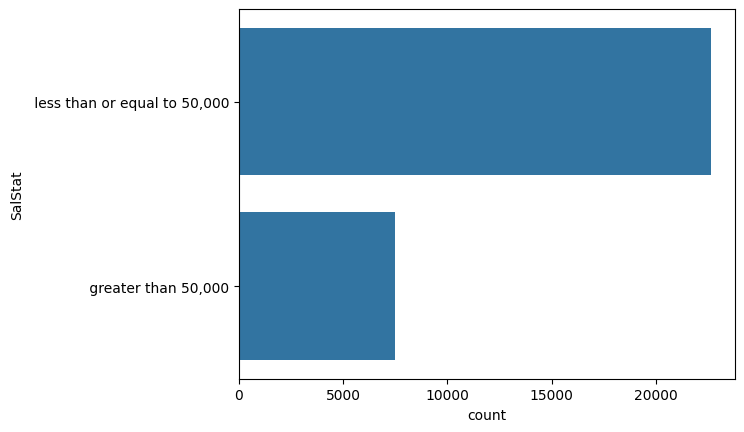

In [27]:
# Frequency distribution of salary status
SalStat = sns.countplot(data2['SalStat'])

<Axes: xlabel='age'>

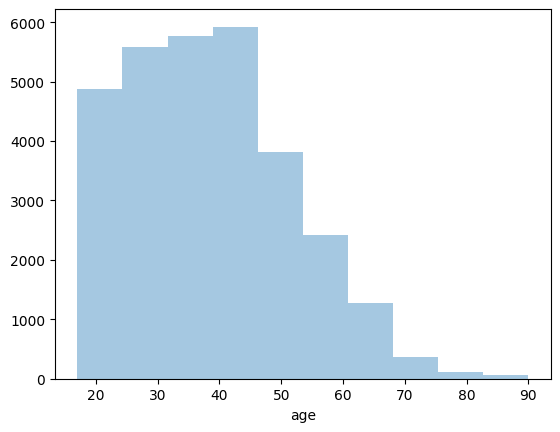

In [28]:
# Histogram of Age
sns.distplot(data2['age'], bins=10, kde=False)

<Axes: xlabel='SalStat', ylabel='age'>

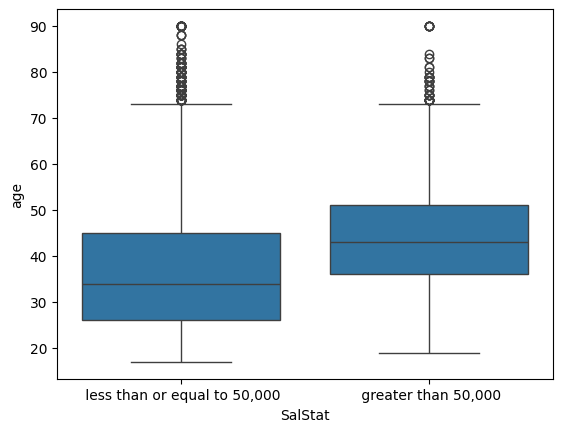

In [29]:
# Box plot: Age vs Salary Status
sns.boxplot(x='SalStat', y='age', data=data2)

<Axes: xlabel='SalStat', ylabel='age'>

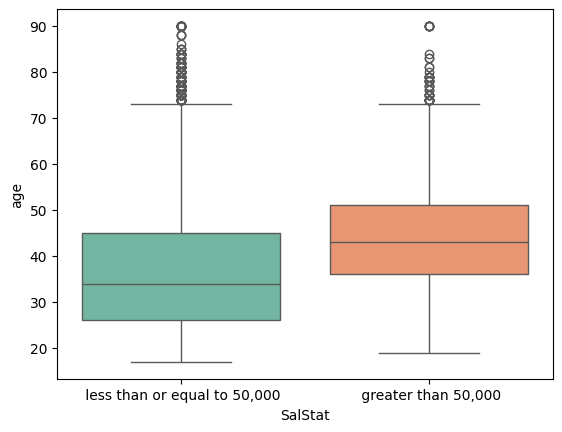

In [30]:
# Box plot: Age vs Salary Status with different colors
sns.boxplot(x='SalStat', y='age', data=data2, palette='Set2')

In [31]:
data2.groupby('SalStat')['age'].median()

SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

### Note
* people with 35-50 age are more likely to earn > 50000 &
* people with 25-35 age are more likely to earn <= 50000

<Axes: xlabel='count', ylabel='JobType'>

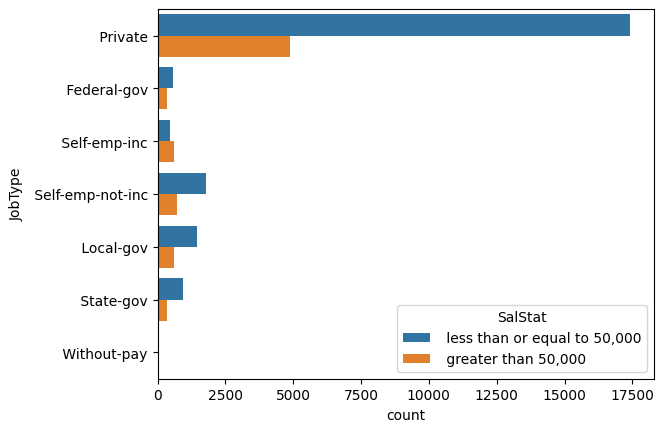

In [32]:
# JobType vs Salary Status
sns.countplot(y= "JobType", data = data2,
             hue='SalStat')

In [33]:
pd.crosstab(index= data2['JobType'],
                            columns=data2['SalStat'],
                            margins = True,
                            normalize='index')

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,0.387063,0.612937
Local-gov,0.294630,0.705370
Private,0.218792,0.781208
Self-emp-inc,0.558659,0.441341
Self-emp-not-inc,0.285714,0.714286
State-gov,0.268960,0.731040
Without-pay,0.000000,1.000000
All,0.248922,0.751078


<Axes: xlabel='count', ylabel='EdType'>

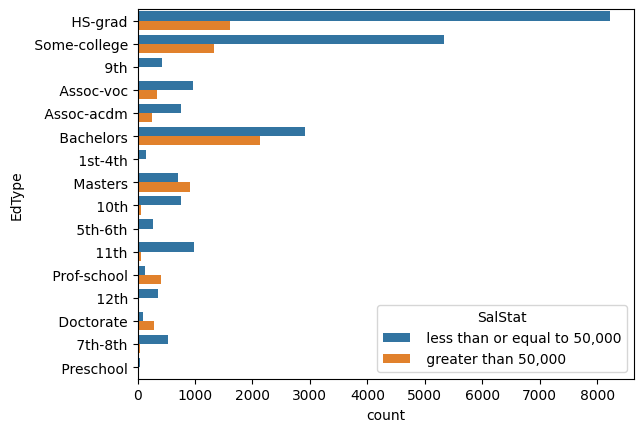

In [34]:
# Education vs Salary Status
sns.countplot(y= "EdType", data = data2,
             hue='SalStat')

In [35]:
pd.crosstab(index= data2['EdType'],
                            columns=data2['SalStat'],
                            margins = True,
                            normalize='index')

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,0.071951,0.928049
11th,0.056298,0.943702
12th,0.076923,0.923077
1st-4th,0.039735,0.960265
5th-6th,0.041667,0.958333
7th-8th,0.062837,0.937163
9th,0.054945,0.945055
Assoc-acdm,0.253968,0.746032
Assoc-voc,0.263198,0.736802


<Axes: xlabel='count', ylabel='occupation'>

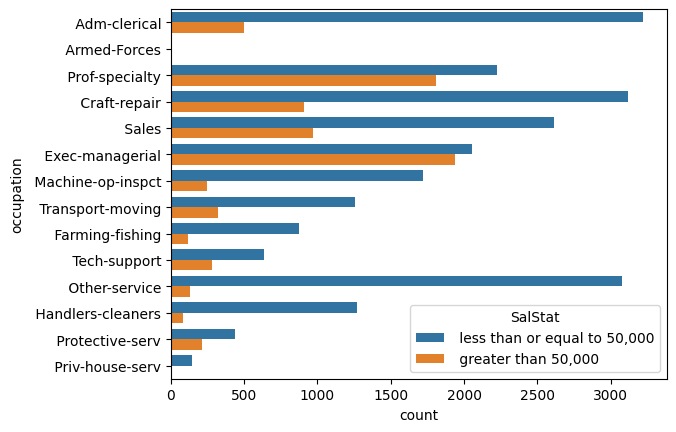

In [36]:
# Occupation vs Salary Status
sns.countplot(y= "occupation", data = data2,
             hue='SalStat')

In [37]:
pd.crosstab(index= data2['occupation'],
                            columns=data2['SalStat'],
                            margins = True,
                            normalize='index')

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,0.133835,0.866165
Armed-Forces,0.111111,0.888889
Craft-repair,0.225310,0.774690
Exec-managerial,0.485220,0.514780
Farming-fishing,0.116279,0.883721
Handlers-cleaners,0.061481,0.938519
Machine-op-inspct,0.124619,0.875381
Other-service,0.041096,0.958904
Priv-house-serv,0.006993,0.993007


<Axes: xlabel='capitalgain'>

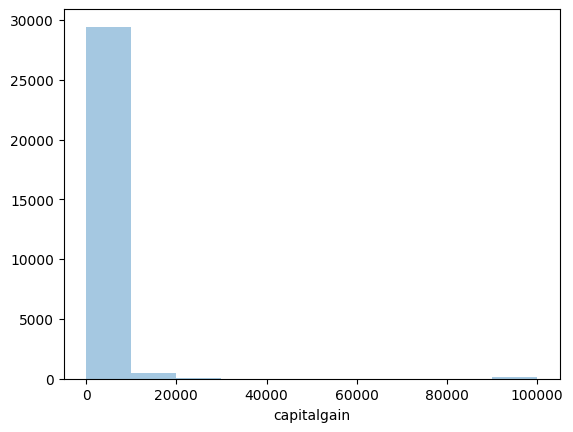

In [38]:
# Histogram of capital gain
sns.distplot(data2['capitalgain'], bins=10, kde=False)

<Axes: xlabel='capitalloss'>

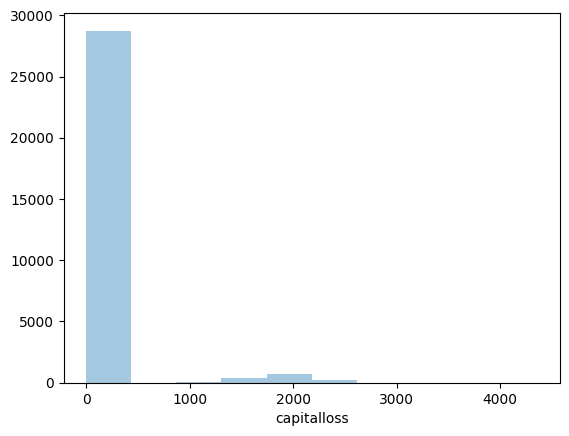

In [39]:
sns.distplot(data2['capitalloss'], bins=10, kde=False)

<Axes: xlabel='SalStat', ylabel='hoursperweek'>

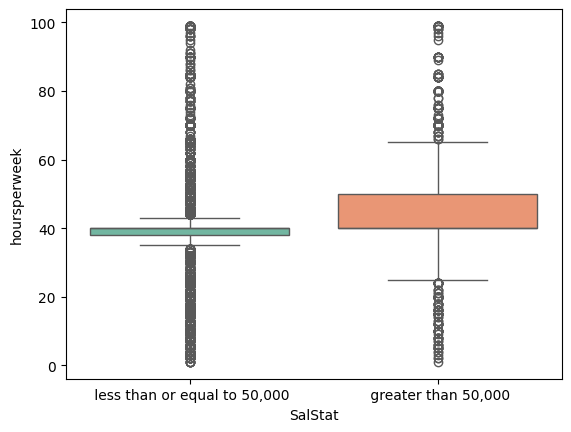

In [40]:
sns.boxplot(x='SalStat', y='hoursperweek', data=data2, palette='Set2')

In [41]:
# ==========================================================
# Logistic Regression
# ===========================================================

In [42]:
# Reindexing the salary status names to 0,1
data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000':0,
                                        ' greater than 50,000':1})

In [43]:
data2.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0


In [44]:
new_data = pd.get_dummies(data2, drop_first=True)

In [45]:
new_data

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,24,0,0,40,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,44,0,0,40,1,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,27,0,0,40,0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,20,0,0,35,0,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31974,34,0,0,40,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31975,23,0,0,40,0,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31976,42,0,0,40,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [46]:
# sorting the column names
columns_list = list(new_data.columns)

In [47]:
columns_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Pr

In [48]:
# separating the input names
features = list(set(columns_list)-set(['SalStat']))

In [49]:
features

['occupation_ Machine-op-inspct',
 'EdType_ Prof-school',
 'maritalstatus_ Separated',
 'relationship_ Unmarried',
 'nativecountry_ Dominican-Republic',
 'maritalstatus_ Married-civ-spouse',
 'EdType_ 1st-4th',
 'occupation_ Exec-managerial',
 'race_ White',
 'race_ Asian-Pac-Islander',
 'nativecountry_ Portugal',
 'EdType_ 9th',
 'relationship_ Wife',
 'age',
 'EdType_ Masters',
 'occupation_ Other-service',
 'occupation_ Transport-moving',
 'race_ Black',
 'nativecountry_ Peru',
 'nativecountry_ Canada',
 'nativecountry_ Honduras',
 'nativecountry_ Puerto-Rico',
 'occupation_ Handlers-cleaners',
 'nativecountry_ Jamaica',
 'nativecountry_ Vietnam',
 'nativecountry_ Outlying-US(Guam-USVI-etc)',
 'occupation_ Armed-Forces',
 'nativecountry_ Italy',
 'JobType_ Private',
 'EdType_ 7th-8th',
 'nativecountry_ El-Salvador',
 'nativecountry_ United-States',
 'JobType_ Self-emp-not-inc',
 'nativecountry_ Yugoslavia',
 'nativecountry_ Japan',
 'occupation_ Priv-house-serv',
 'maritalstatus_ Ma

In [50]:
# Sorting the output values in y
y = new_data['SalStat'].values

In [51]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [52]:
# sorting the values from input features
x = new_data[features].values

In [53]:
x

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, True, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, True, False]], dtype=object)

In [54]:
# splitting the data into train and test
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=0)

In [55]:
# make the instance of the model
logistic = LogisticRegression()

In [56]:
# fitting the values for x and y
logistic.fit(train_x, train_y)

LogisticRegression()

In [57]:
logistic.coef_

array([[-3.50691642e-01,  2.34117841e-01, -1.79151250e-01,
        -5.74823226e-01, -2.57555750e-02,  1.12595034e+00,
        -7.18342568e-02,  8.97255066e-01, -3.23796539e-01,
        -1.18517716e-01, -1.37751212e-02, -1.72714616e-01,
         2.46183372e-01,  1.32622813e-05,  5.26800861e-01,
        -7.39833529e-01, -1.95686278e-01, -4.33466737e-01,
        -1.20965136e-02,  3.58091692e-03, -2.24786624e-03,
        -4.14670827e-02, -3.39161069e-01, -1.19674492e-02,
        -3.37691195e-02, -7.43158258e-03, -1.94399051e-03,
        -1.90764427e-03, -3.19677730e-01, -2.50695157e-01,
        -3.97335667e-02, -4.22094377e-01, -5.85485533e-01,
        -5.35023265e-04, -4.95896500e-04, -4.06071566e-02,
         1.65509901e-02, -2.64139614e-02, -3.91193560e-01,
        -8.36983992e-03,  6.69896006e-04, -3.22018544e-01,
        -3.88346684e-03, -1.43382994e-02,  6.83434031e-01,
         5.71805339e-03, -9.58603201e-02, -3.86359736e-02,
        -3.04530656e-01,  2.48711077e-01, -3.94292485e-0

In [58]:
logistic.intercept_

array([-1.03961807])

In [59]:
# prediction from test data
prediction = logistic.predict(test_x)

In [60]:
print(prediction)

[0 0 0 ... 0 0 0]


In [61]:
# confusion matrix
confusion_matrix = confusion_matrix(test_y, prediction)

In [62]:
print(confusion_matrix)

[[6293  530]
 [ 954 1272]]


In [63]:
#calculating  the accuracy score
accuracy_score = accuracy_score(test_y, prediction)

In [64]:
print(accuracy_score)

0.8360039783401481


In [65]:
# printing the misclassified values from prediction
print('Misclassified samples : %d' % (test_y != prediction).sum())

Misclassified samples : 1484


In [66]:
#================================================================
# KNN
#=================================================================

In [67]:
# importing the library of KNN
from sklearn.neighbors import KNeighborsClassifier

In [68]:
# importing library for plotting
import matplotlib.pyplot as plt

In [69]:
# Sorting the K nearest neighbour classifier
KNN_classifier = KNeighborsClassifier(n_neighbors=5)

In [71]:
# fitting the values for x and y
KNN_classifier.fit(train_x,train_y)

KNeighborsClassifier()

In [72]:
# predicting the test values with model
prediction = KNN_classifier.predict(test_x)

In [80]:
from sklearn.metrics import confusion_matrix as cm  # Rename the import

# performance metric check
cm_matrix = cm(test_y, prediction)  # Now you're calling the function correctly


In [81]:
cm_matrix

array([[6176,  647],
       [ 808, 1418]], dtype=int64)

In [83]:
from sklearn.metrics import accuracy_score as acc_score  # Rename the import

accuracy = acc_score(test_y, prediction)  # Now you're calling the function correctly


In [84]:
accuracy

0.8392087523483258

In [85]:
print("Misclassified samples : %d" % (test_y !=prediction).sum())

Misclassified samples : 1455


In [86]:
"""
Effect of K value on classifier
"""

'\nEffect of K value on classifier\n'

In [88]:
Misclassified_sample = []
# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())

print (Misclassified_sample)

[1766, 1516, 1522, 1437, 1455, 1455, 1456, 1452, 1481, 1432, 1465, 1446, 1451, 1435, 1421, 1415, 1435, 1423, 1443]


In [ ]:
#============================
# End
#==============================